In [1]:
# import the packages
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import to_categorical

2023-11-12 14:45:39.915478: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 14:45:40.346682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 14:45:41.513006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# train_images = rgb2gray(train_images).reshape(50000,32,32,1)
# test_images = rgb2gray(test_images).reshape(10000,32,32,1)
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels  = to_categorical(val_labels)

print(train_images.shape)
print(val_images.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


## test


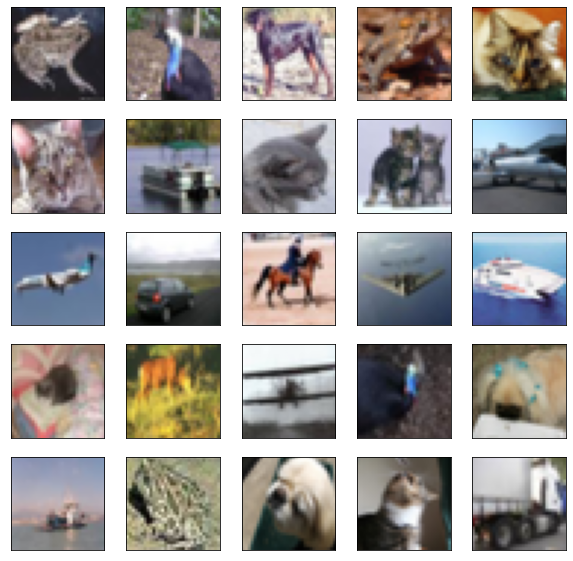

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    # plt.xlabel(class_names[train_labels[i][0]])
plt.show()

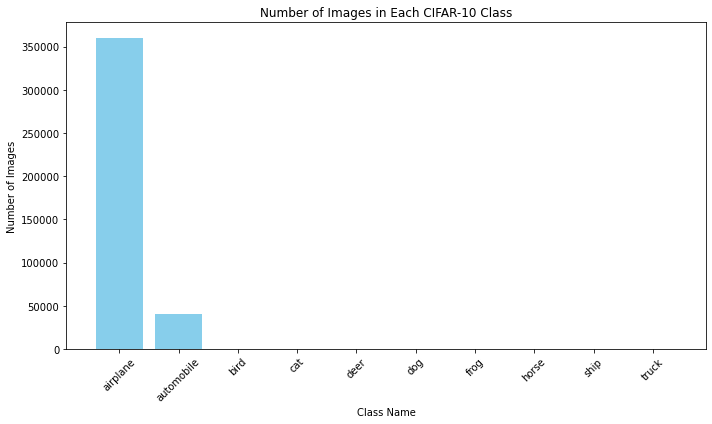

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a dictionary to count the number of images in each class
class_counts = {}
for i in range(10):
    class_counts[class_names[i]] = len(train_labels[train_labels == i])

# Extract class names and counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each CIFAR-10 Class')
plt.xticks(rotation=45)
plt.tight_layout()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels), verbose=1)


2023-11-12 12:41:22.649779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 12:41:22.691831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 12:41:22.691862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 12:41:22.695149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 12:41:22.695176: I tensorflow/compile

Epoch 1/10


2023-11-12 12:41:27.951884: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-12 12:41:30.036680: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-12 12:41:35.681399: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 12:41:37.438758: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 12:41:38.418502: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0dddb71720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-12 12:41:38.418549: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU

625/625 [==============================] - 21s 12ms/step - loss: 1.8339 - accuracy: 0.3164 - val_loss: 1.5082 - val_accuracy: 0.4436
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 1.4434 - accuracy: 0.4680 - val_loss: 1.2526 - val_accuracy: 0.5545
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 1.2308 - accuracy: 0.5570 - val_loss: 1.0761 - val_accuracy: 0.6128
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 1.0825 - accuracy: 0.6150 - val_loss: 0.9359 - val_accuracy: 0.6646
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.9740 - accuracy: 0.6535 - val_loss: 0.8903 - val_accuracy: 0.6914
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.8858 - accuracy: 0.6876 - val_loss: 0.7981 - val_accuracy: 0.7133
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.8232 - accuracy: 0.7101 - val_loss: 0.7573 - val_accuracy: 0.7337
Epoch 8/10

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))

Epoch 1/30


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5777, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


2023-11-12 12:58:25.679541: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 283862173438779076


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/root/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/root/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/root/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/root/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/root/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/root/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/root/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/root/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/root/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 433, in do_execute

  File "/root/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code

  File "/tmp/ipykernel_14244/1402894331.py", line 8, in <module>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2272, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4079, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2042, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2025, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2013, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1895, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1185, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_34161]

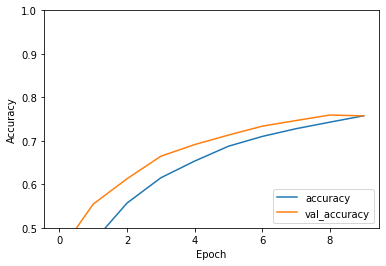

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

NameError: name 'test_acc' is not defined

## hyper parameter tuning

In [3]:
def create_model(optimizer='adam', dropout_rate=0.25):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(10, activation='softmax'))
  # compile model
  # opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(val_images, val_labels), verbose=1)
  return model

In [ ]:
model2 = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=1,dropout_rate=0.25)

# Define hyperparameters for random search
param_dist = {
    'optimizer': [Adam(lr=0.001), SGD(lr=0.001, momentum=0.9)],
    'dropout_rate': [0.3, 0.5,0.2]
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model2, param_distributions=param_dist, n_iter=2, cv=2)
random_result = random_search.fit(train_images, train_labels,validation_data=(val_images, val_labels))

# Print the best parameters and corresponding accuracy
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [4]:
model = create_model(SGD(lr=0.001, momentum=0.9),0.2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

2023-11-12 14:45:51.014946: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:45:51.231939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:45:51.231996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:45:51.238836: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:45:51.238902: I tensorflow/compile

Epoch 1/20


2023-11-12 14:45:54.215535: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-12 14:45:56.436625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-12 14:45:58.199466: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 14:45:58.670860: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-12 14:45:58.694479: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4c351f8270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-12 14:45:58.694514: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor devi

625/625 [==============================] - 14s 10ms/step - loss: 1.8925 - accuracy: 0.2930 - val_loss: 1.5505 - val_accuracy: 0.4264
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 1.4802 - accuracy: 0.4559 - val_loss: 1.2726 - val_accuracy: 0.5422
Epoch 3/20
625/625 [==============================] - 5s 9ms/step - loss: 1.2733 - accuracy: 0.5420 - val_loss: 1.1147 - val_accuracy: 0.5959
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 1.1082 - accuracy: 0.6043 - val_loss: 0.9415 - val_accuracy: 0.6650
Epoch 5/20
625/625 [==============================] - 5s 9ms/step - loss: 1.0041 - accuracy: 0.6454 - val_loss: 0.9293 - val_accuracy: 0.6672
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.9259 - accuracy: 0.6749 - val_loss: 0.8343 - val_accuracy: 0.7022
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.8557 - accuracy: 0.7000 - val_loss: 0.7738 - val_accuracy: 0.7254
Epoch 8/20
625/

In [5]:
print(test_acc)

0.7822999954223633


## using pretrained model


In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load CIFAR-10 data
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Preprocess the data
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a new model and add the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on CIFAR-10 data
model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY))

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

2023-11-12 14:48:45.837507: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 14:48:46.254328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 14:48:47.187816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2023-11-12 14:48:51.309710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:48:51.527155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:48:51.527196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:48:51.531924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 14:48:51.531972: I tensorflow/compile

Epoch 1/5


2023-11-12 14:49:08.689149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-12 14:49:10.770838: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-12 14:49:12.640419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-12 14:49:12.659651: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561fb59ae7a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-12 14:49:12.659687: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-12 14:49:12.727119: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-12 14:

1563/1563 [==============================] - 76s 32ms/step - loss: 1.2594 - accuracy: 0.5747 - val_loss: 2.1844 - val_accuracy: 0.4328
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9608 - accuracy: 0.6776 - val_loss: 1.1098 - val_accuracy: 0.6530
Epoch 3/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8912 - accuracy: 0.7013 - val_loss: 1.2704 - val_accuracy: 0.6433
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8466 - accuracy: 0.7137 - val_loss: 1.7207 - val_accuracy: 0.5877
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 2.1194 - accuracy: 0.4999
Test Loss: 2.119431257247925, Test Accuracy: 0.4999000132083893


### online model


In [ ]:

from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()